<a href="https://colab.research.google.com/github/delaneybrown23/knn/blob/main/Delaney_Brown_assignment_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

Responses to Q0:

1. The difference between regression and classification is in the type of result that their processes predict. Through regression, data is utilized to produce and predict a result that is numeric, while through classification, data is utilized to produce and predict a result that is categorical.
2. A confusion table is a manifestation of the results of using a classifier, and it demonstrates how well the classifier works. The table consists of a cross-tabulation of the actual values and the predicted values, demonstrating how well the classifier, and therefore the model worked.
3. The SSE quantifies the difference between the actual values and the predicted values for a particular model's effectiveness.
4. Overfitting takes place when a particular model's complication is too extensive for usage in describing a certain pattern, while underfitting takes place when a particular model's complication is too little for usage in describing a certain pattern.
5. Splitting the data into training and testing sets, and choosing a variety of k values through which to evaluate the SSE from the predicted value in the training set to the actual value in the testing set allows for the the best k value to be picked, based on which SSE is the least. This improves model performance as it demonstrates through which k value the model is the most effective in its predictions based on k values, and subsequently, SSE values.
6. For the approach of reporting a class label as a prediction, a strength is that one can visualize the predictions of the numbers of each class label, which demonstrates the model's correctness. The weakness is that this level of the model's correctness is not typically supported as the best way to evaluate a model's effectiveness. In terms of the other approach of reporting a class label as a probability distribution over class labels, the strength is that the model's correctness can be compared across chosen k values to determine the best choice in k in the form of a plot. A confusion matrix can also be created to further visualize the model's effectiveness. A weakness of this approach is the variations in what the training and testing data can contain, which can lead to certain data being left out and therefore impacting the model.

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [28]:
# Q1 - Part 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('USA_cars_datasets.csv')
df.head()

df = df.loc[:,('price','year','mileage')]

# Head and dimensions of df
df.head()
print(df.shape, '\n')

# Any NA's
print(df['price'].value_counts(), '\n')
print(df['year'].value_counts(), '\n')
print(df['mileage'].value_counts(), '\n')

print(df['price'].unique(), '\n')
print(df['year'].unique(), '\n')
print(df['mileage'].unique(), '\n')

# I don't see any NA's among these variables.

(2499, 3) 

price
0        43
16500    26
13900    21
15500    19
15000    19
         ..
12560     1
11760     1
7340      1
6530      1
30100     1
Name: count, Length: 790, dtype: int64 

year
2019    892
2018    395
2017    377
2016    203
2015    196
2014    104
2013     86
2012     72
2020     48
2011     23
2008     18
2010     13
2009     11
2003      9
2006      8
2004      6
2007      6
2005      6
2001      5
1998      4
2000      4
2002      2
1994      2
1997      2
1996      2
1973      1
1999      1
1984      1
1995      1
1993      1
Name: count, dtype: int64 

mileage
1        11
0         6
31727     2
33808     2
21774     2
         ..
90685     1
54141     1
82240     1
66167     1
31371     1
Name: count, Length: 2439, dtype: int64 

[ 6300  2899  5350 25000 27700  5700  7300 13350 14600  5250 10400 12920
 31900  5430 20700 12710  5200 16500  5210 38100 12520 15000  6180 20800
 11900 21500 12000  4190 13000 18500 29800  5330 16600 19200  7320  7000
 30500  6330 55

In [29]:
# Q1 - Part 2

# Maxmin normalize year, mileage

from sklearn.neighbors import KNeighborsRegressor

# Vector for target variable
y = df['price']
# Feature matrix
X = df.loc[:,['year','mileage']]
print(X.head())
print(X.describe())

# Maxmin normalize

def maxmin(z):
  z = (z-min(z))/(max(z)-min(z))
  return z

X = X.apply(maxmin)
print(X.head())
print(X.describe())


   year  mileage
0  2008   274117
1  2011   190552
2  2018    39590
3  2014    64146
4  2018     6654
              year       mileage
count  2499.000000  2.499000e+03
mean   2016.714286  5.229869e+04
std       3.442656  5.970552e+04
min    1973.000000  0.000000e+00
25%    2016.000000  2.146650e+04
50%    2018.000000  3.536500e+04
75%    2019.000000  6.347250e+04
max    2020.000000  1.017936e+06
       year   mileage
0  0.744681  0.269287
1  0.808511  0.187194
2  0.957447  0.038892
3  0.872340  0.063016
4  0.957447  0.006537
              year      mileage
count  2499.000000  2499.000000
mean      0.930091     0.051377
std       0.073248     0.058654
min       0.000000     0.000000
25%       0.914894     0.021088
50%       0.957447     0.034742
75%       0.978723     0.062354
max       1.000000     1.000000


In [30]:
# Q1 - Part 3
# Splitting into 80% training, 20% evaluation

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

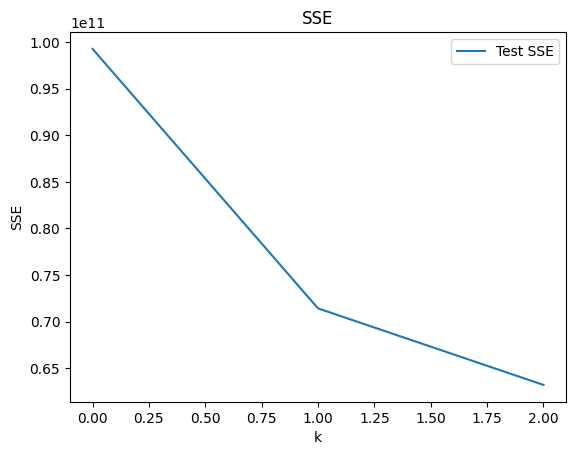

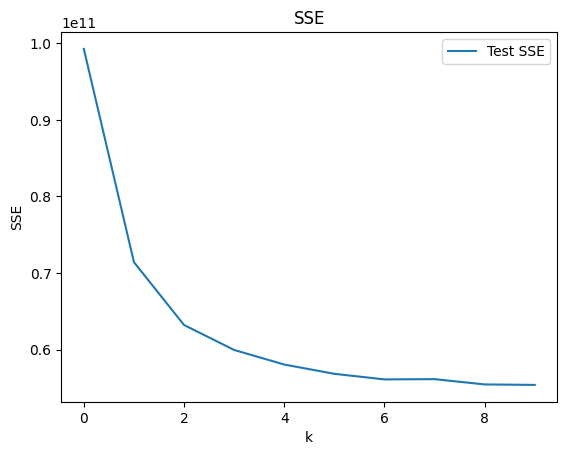

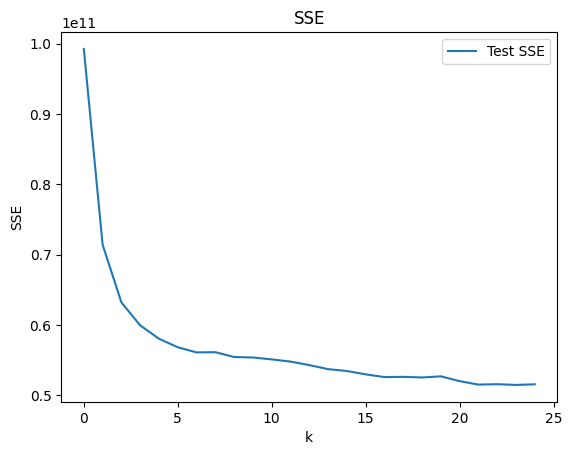

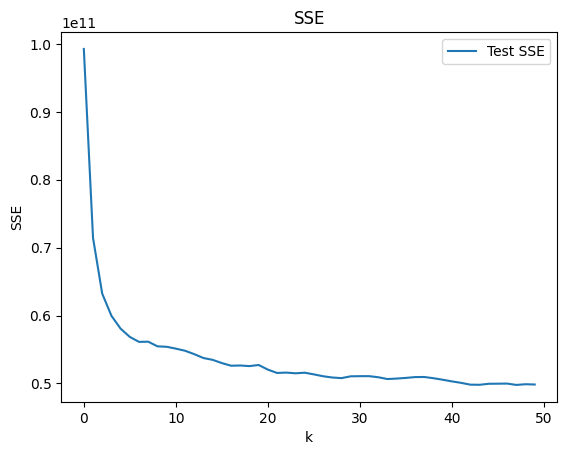

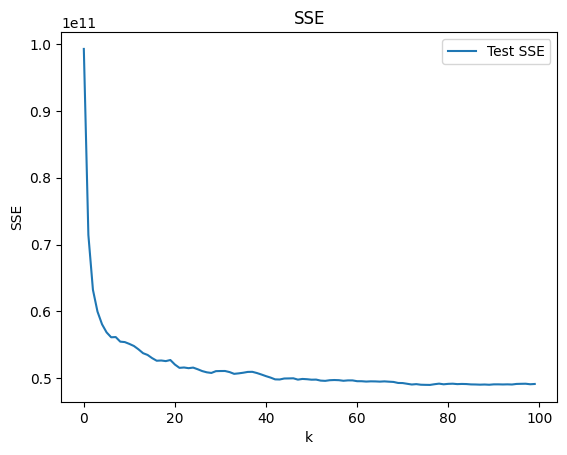

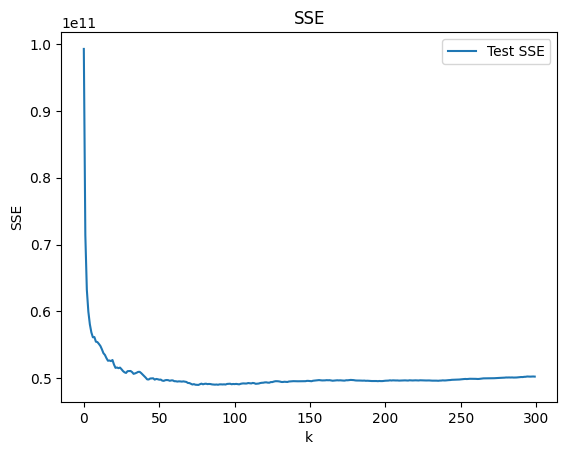

In [31]:
# Q1 - Part 4
# k values of 3, 10, 25, 50, 100, 300

# k = 3
k_bar = 3
SSE = np.zeros(k_bar)
SSE_on_train = np.zeros(k_bar)

for k in range(k_bar):
  model = KNeighborsRegressor(n_neighbors=k+1)
  fitted_model = model.fit(X_train,y_train)
  y_hat = fitted_model.predict(X_test)
  SSE[k] = np.sum((y_test-y_hat)**2)
  y_hat = fitted_model.predict(X_train)
  SSE_on_train[k] = np.sum((y_train-y_hat)**2)

plt.plot(np.arange(0,k_bar),SSE,label='Test SSE')
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()

# k = 10
k_bar = 10
SSE = np.zeros(k_bar)
SSE_on_train = np.zeros(k_bar)

for k in range(k_bar):
  model = KNeighborsRegressor(n_neighbors=k+1)
  fitted_model = model.fit(X_train,y_train)
  y_hat = fitted_model.predict(X_test)
  SSE[k] = np.sum((y_test-y_hat)**2)
  y_hat = fitted_model.predict(X_train)
  SSE_on_train[k] = np.sum((y_train-y_hat)**2)

plt.plot(np.arange(0,k_bar),SSE,label='Test SSE')
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()

# k = 25
k_bar = 25
SSE = np.zeros(k_bar)
SSE_on_train = np.zeros(k_bar)

for k in range(k_bar):
  model = KNeighborsRegressor(n_neighbors=k+1)
  fitted_model = model.fit(X_train,y_train)
  y_hat = fitted_model.predict(X_test)
  SSE[k] = np.sum((y_test-y_hat)**2)
  y_hat = fitted_model.predict(X_train)
  SSE_on_train[k] = np.sum((y_train-y_hat)**2)

plt.plot(np.arange(0,k_bar),SSE,label='Test SSE')
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()

# k = 50
k_bar = 50
SSE = np.zeros(k_bar)
SSE_on_train = np.zeros(k_bar)

for k in range(k_bar):
  model = KNeighborsRegressor(n_neighbors=k+1)
  fitted_model = model.fit(X_train,y_train)
  y_hat = fitted_model.predict(X_test)
  SSE[k] = np.sum((y_test-y_hat)**2)
  y_hat = fitted_model.predict(X_train)
  SSE_on_train[k] = np.sum((y_train-y_hat)**2)

plt.plot(np.arange(0,k_bar),SSE,label='Test SSE')
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()

# k = 100
k_bar = 100
SSE = np.zeros(k_bar)
SSE_on_train = np.zeros(k_bar)

for k in range(k_bar):
  model = KNeighborsRegressor(n_neighbors=k+1)
  fitted_model = model.fit(X_train,y_train)
  y_hat = fitted_model.predict(X_test)
  SSE[k] = np.sum((y_test-y_hat)**2)
  y_hat = fitted_model.predict(X_train)
  SSE_on_train[k] = np.sum((y_train-y_hat)**2)

plt.plot(np.arange(0,k_bar),SSE,label='Test SSE')
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()

# k = 300
k_bar = 300
SSE = np.zeros(k_bar)
SSE_on_train = np.zeros(k_bar)

for k in range(k_bar):
  model = KNeighborsRegressor(n_neighbors=k+1)
  fitted_model = model.fit(X_train,y_train)
  y_hat = fitted_model.predict(X_test)
  SSE[k] = np.sum((y_test-y_hat)**2)
  y_hat = fitted_model.predict(X_train)
  SSE_on_train[k] = np.sum((y_train-y_hat)**2)

plt.plot(np.arange(0,k_bar),SSE,label='Test SSE')
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()

# Patterns: As k increases, the slope of the scatterplot is becoming more curved towards the downward left corner.
# The average SSE is becoming lower as k increases, as the range of the x axis is also becoming larger.


In [32]:
# Q1 - Part 5

# Optimal k value
SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = min_index[0]+1
print(k_star)

# The optimal k value for this data is 77.

[77]


In [33]:
# Q1 - Part 6

# Based on the plots created, as k increased, the predicted price value and actual price values were more similar, meaning the predicted values were more accurate as k increased.
# When k was lower, the model underfit the data, while when k was at its highest, the model overfit the data.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data.

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data.
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE.
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.